In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results.csv", encoding="latin1", parse_dates=['DateTime'])
df.columns = df.columns.str.strip()
df = df[df['Season'] >= '2015-16']

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.day_name()



In [ ]:
df_model = df.dropna(subset=['FTHG','HST','AST','HC','AC','HF','AF'])

poisson_model = smf.glm(
    formula='FTHG ~ HST + AST + HC + AC + HF + AF',
    data=df_model,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   FTHG   No. Observations:                 2589
Model:                            GLM   Df Residuals:                     2582
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3576.9
Date:                Thu, 02 Oct 2025   Deviance:                       2272.1
Time:                        10:48:49   Pearson chi2:                 1.86e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3273
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1540      0.095     -1.626      0.1

In [4]:
df_logit = df.dropna(subset=['FTHG','FTAG','HST','AST','HC','AC','HF','AF'])
X = df_logit[['FTHG','FTAG','HST','AST','HC','AC','HF','AF']]
X = sm.add_constant(X)
y = df_logit['FTR']

logit_model = sm.MNLogit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: nan
         Iterations 22
                          MNLogit Regression Results                          
Dep. Variable:                    FTR   No. Observations:                 2589
Model:                        MNLogit   Df Residuals:                     2571
Method:                           MLE   Df Model:                           16
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                     nan
Time:                        10:49:15   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -2760.4
Covariance Type:            nonrobust   LLR p-value:                       nan
     FTR=D       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
FTHG              nan        nan 

C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


In [ ]:
season_goals_series = df.groupby('Season')['FTHG'].mean()
model = ExponentialSmoothing(season_goals_series, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(3)  
print("Forecasted average home goals for next seasons:\n", forecast)


Forecasted average home goals for next seasons:
 7    1.431151
8    1.412392
9    1.393632
dtype: float64


C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.p

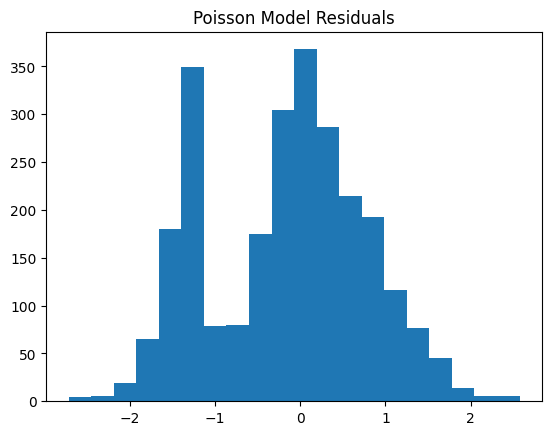

AIC: 7167.877650308657, BIC: -18019.95426449685


C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [ ]:
residuals = poisson_model.resid_deviance
plt.hist(residuals, bins=20)
plt.title("Poisson Model Residuals")
plt.show()

print(f"AIC: {poisson_model.aic}, BIC: {poisson_model.bic}")


In [ ]:
df_bin = df.dropna(subset=['FTR','HST','AST','HC','AC','HF','AF'])
df_bin['HomeWin'] = (df_bin['FTR'] == 'H').astype(int)

X_bin = df_bin[['HST','AST','HC','AC','HF','AF']]
X_bin = sm.add_constant(X_bin) 
y_bin = df_bin['HomeWin']

glm_bin = sm.GLM(y_bin, X_bin, family=sm.families.Binomial()).fit() # (this is to Fit GLM with binomial link)

print(glm_bin.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HomeWin   No. Observations:                 2589
Model:                            GLM   Df Residuals:                     2582
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.4
Date:                Thu, 02 Oct 2025   Deviance:                       2712.8
Time:                        10:58:46   Pearson chi2:                 2.55e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2774
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3319      0.277     -1.199      0.2

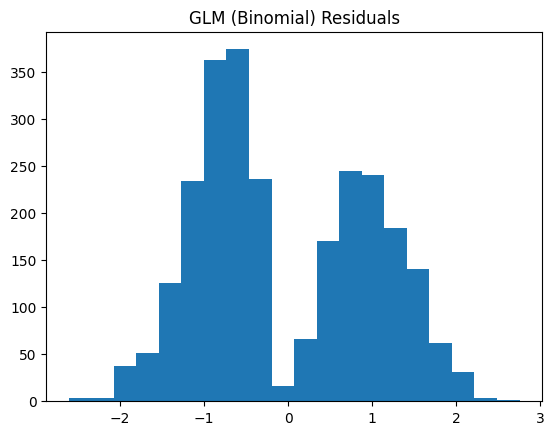

AIC: 2726.8384243293804, BIC: -17579.16923738909


C:\Users\SMRUTHI DESAI\AppData\Roaming\Python\Python312\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [8]:
residuals_bin = glm_bin.resid_deviance
plt.hist(residuals_bin, bins=20)
plt.title("GLM (Binomial) Residuals")
plt.show()

print(f"AIC: {glm_bin.aic}, BIC: {glm_bin.bic}")


In [ ]:
df['HomeUnderdogWin'] = ((df['FTHG'] > df['FTAG']) & (df['FTR'] == 'H')).astype(int)

upset_count = df['HomeUnderdogWin'].sum()
total_matches = len(df)
print(f"Upsets: {upset_count} / {total_matches} ({upset_count/total_matches:.2%})")


Upsets: 1144 / 2589 (44.19%)


In [ ]:
from scipy import stats


cont_table = pd.crosstab(df['Weekday'], df['FTR'])
chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print(f"Weekday vs Result: chi2={chi2:.2f}, p={p:.4f}")

cont_table_ref = pd.crosstab(df['Referee'], df['FTR'])
chi2_ref, p_ref, _, _ = stats.chi2_contingency(cont_table_ref)
print(f"Referee vs Result: chi2={chi2_ref:.2f}, p={p_ref:.4f}")


Weekday vs Result: chi2=7.05, p=0.8543
Referee vs Result: chi2=54.91, p=0.8741


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
anova_model = ols('HST ~ C(FTR)', data=df.dropna(subset=['HST'])).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


                sum_sq      df           F         PR(>F)
C(FTR)     3555.374487     2.0  315.054932  3.546943e-123
Residual  14591.421187  2586.0         NaN            NaN


In [ ]:
df = df.sort_values(['HomeTeam','DateTime'])
df['HomeMomentum'] = df.groupby('HomeTeam')['FTHG'].rolling(3).mean().reset_index(0,drop=True)


In [13]:
df = df.sort_values(['HomeTeam','DateTime'])
df['HomeMomentum'] = df.groupby('HomeTeam')['FTHG'].rolling(3).mean().reset_index(0,drop=True)


In [16]:
df['HomeMatchesLast3'] = df.groupby('HomeTeam')['FTHG'].shift(1).rolling(3).sum()



In [17]:
poisson_model_momentum = smf.glm(
    formula='FTHG ~ HST + AST + HC + AC + HF + AF + HomeMomentum',
    data=df.dropna(subset=['FTHG','HST','AST','HC','AC','HF','AF','HomeMomentum']),
    family=sm.families.Poisson()
).fit()
print(poisson_model_momentum.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   FTHG   No. Observations:                 2527
Model:                            GLM   Df Residuals:                     2519
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3298.9
Date:                Thu, 02 Oct 2025   Deviance:                       1812.9
Time:                        11:11:25   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4255
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8466      0.103     -8.227   

In [19]:
df_bin = df.dropna(subset=['FTR','HST','AST','HC','AC','HF','AF','HomeMomentum'])
df_bin = df_bin.copy()
df_bin['HomeWin'] = (df_bin['FTR'] == 'H').astype(int)


X_bin = df_bin[['HST','AST','HC','AC','HF','AF','HomeMomentum']]
X_bin = sm.add_constant(X_bin)
y_bin = df_bin['HomeWin']

glm_bin_momentum = sm.GLM(y_bin, X_bin, family=sm.families.Binomial()).fit()
print(glm_bin_momentum.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HomeWin   No. Observations:                 2527
Model:                            GLM   Df Residuals:                     2519
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1208.3
Date:                Thu, 02 Oct 2025   Deviance:                       2416.7
Time:                        11:13:08   Pearson chi2:                 2.43e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3418
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.7175      0.312     -5.510   

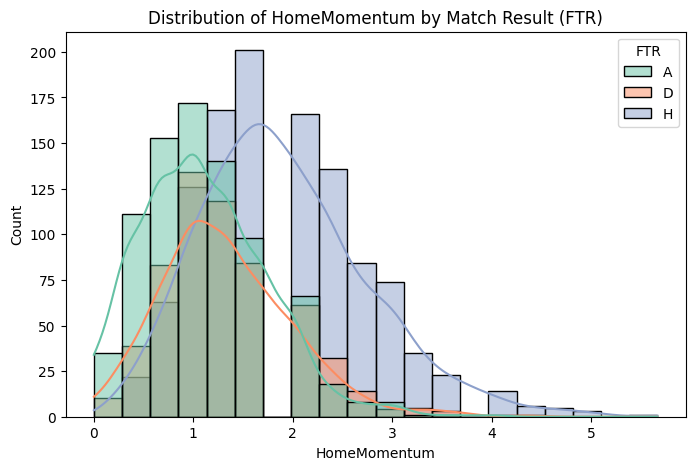

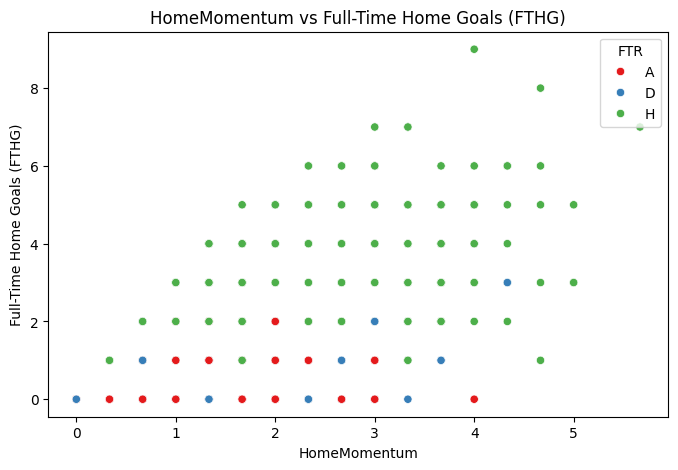

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of HomeMomentum by match result
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='HomeMomentum', hue='FTR', bins=20, kde=True, palette='Set2')
plt.title('Distribution of HomeMomentum by Match Result (FTR)')
plt.xlabel('HomeMomentum')
plt.ylabel('Count')
plt.show()

# Scatter plot of HomeMomentum vs FTHG
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='HomeMomentum', y='FTHG', hue='FTR', palette='Set1')
plt.title('HomeMomentum vs Full-Time Home Goals (FTHG)')
plt.xlabel('HomeMomentum')
plt.ylabel('Full-Time Home Goals (FTHG)')
plt.show()


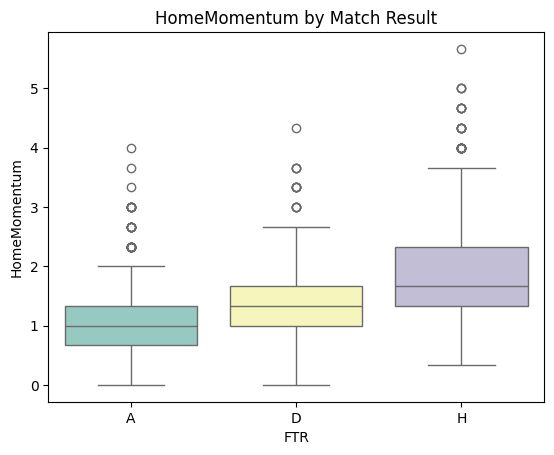

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='FTR', y='HomeMomentum', hue='FTR', palette='Set3', dodge=False, legend=False)
plt.title('HomeMomentum by Match Result')
plt.show()

